# 통계량 및 분포

In [11]:
import json
file_path = "/home/work/factchecking/PetQA/data/interim/unique_data.json"
with open(file_path, "r", encoding="utf-8") as f:
    data = json.load(f)

selected_cnt = 0
for item in data:
    answers = item["answers"]
    for a in answers:
        if a["selected"]:
            selected_cnt += 1
print(selected_cnt)

64129


In [1]:
import pandas as pd
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tiktoken
import math
import re
import sys
from collections import Counter

plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (10, 6)
sns.set_style("whitegrid")

In [12]:
import json
raw_data_path = "/home/work/factchecking/PetQA/data/interim/cleaned_data.json"
with open(raw_data_path, 'r', encoding='utf-8') as f:
	data = json.load(f)
print(data[0].keys())
print(len(data))

dict_keys(['q_id', 'title', 'content', 'answer', 'a_id', 'answer_type', 'question_date', 'answer_date', 'animal_type', 'preprocessed_question', 'preprocessed_answer'])
55393


55393


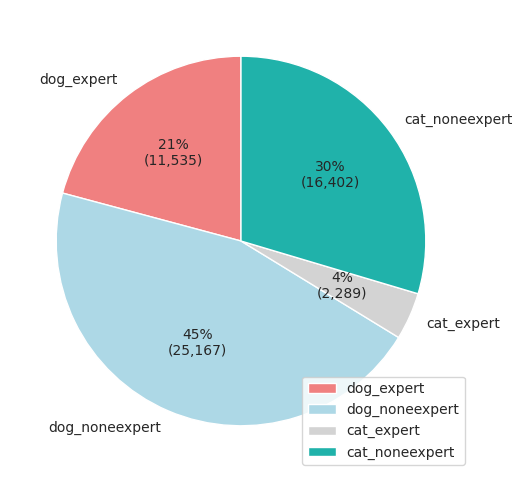

In [24]:
dog_expert = []
dog_noneexpert = []
cat_expert = []
cat_noneexpert = []

for item in data:
    if item['animal_type'] == 'dog':
        if item['answer_type'] == 'expert':
            dog_expert.append(item)
        else:
            dog_noneexpert.append(item)
    else:
        if item['answer_type'] == 'expert':
            cat_expert.append(item)
        else:
            cat_noneexpert.append(item)

labels = ['dog_expert', 'dog_noneexpert', 'cat_expert', 'cat_noneexpert']
sizes = [len(dog_expert), len(dog_noneexpert), len(cat_expert), len(cat_noneexpert)]
colors = ['lightcoral', 'lightblue', 'lightgray', 'lightseagreen']
total_size = sum(sizes)
print(total_size)

def func(pct, allvals):
    absolute = int(round(pct/100.*sum(allvals)))
    return "{:.0f}%\n({:,d})".format(pct, absolute)

plt.pie(
    sizes,
    labels=labels,
    startangle=90,
    autopct=lambda pct: func(pct, sizes),
    colors=colors,
)
plt.legend(labels)
plt.show()

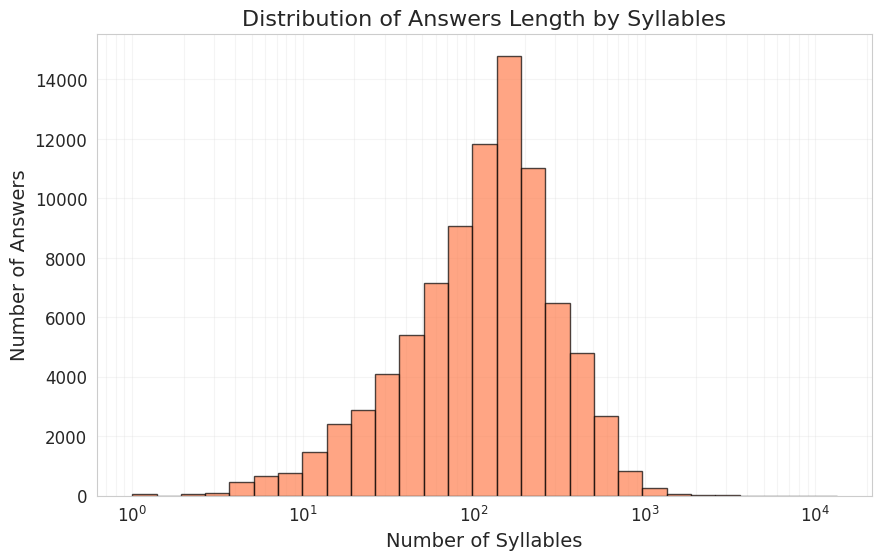

min_syllable: 0
max_syllable: 11128


In [7]:
import json
import matplotlib.pyplot as plt
import numpy as np


def count_korean_syllables(text):
	return sum(1 for char in text if '가' <= char <= '힣')

syllable_counts = {}
for item in data:
	# title = item.get('title')
	# content = item.get('content', '')
	# question = f"{title}\n{content}".strip()
	# if question:
	#     syllable_cnt = count_korean_syllables(question)
	#     syllable_counts[syllable_cnt] = syllable_counts.get(syllable_cnt, 0) + 1
	answers = item.get('answers', [])
	for answer in answers:
		answer_text = answer.get('answer', '')
		if answer_text:
			syllable_cnt = count_korean_syllables(answer_text)
			syllable_counts[syllable_cnt] = syllable_counts.get(syllable_cnt, 0) + 1

syllables = list(syllable_counts.keys())
counts = list(syllable_counts.values())

# 로그 스케일 빈 생성
min_syllable = min(syllables) if syllables else 1
max_syllable = max(syllables) if syllables else 10000

bins = np.logspace(np.log10(max(1, min_syllable * 0.8)), np.log10(max_syllable * 1.2), num=30)

plt.figure(figsize=(10, 6))
plt.hist(syllables, bins=bins, weights=counts, color='coral', edgecolor='black', alpha=0.7)
plt.xscale('log') # x축을 로그 스케일로 설정
plt.xlabel('Number of Syllables', fontsize=14)
plt.ylabel('Number of Answers', fontsize=14)
plt.title('Distribution of Answers Length by Syllables', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.show()

print(f"min_syllable: {min_syllable}")
print(f"max_syllable: {max_syllable}")


In [8]:
model = 'gpt-4o-mini'
encoding = tiktoken.encoding_for_model(model) 

def count_sentences(text):
	if not text or not isinstance(text, str):
		return 0
	# 문장 구분자: 마침표, 느낌표, 물음표, 줄바꿈
	sentences = re.split(r'[.!?]+|\n+', text.strip())
	# 빈 문장 제거
	sentences = [s.strip() for s in sentences if s.strip()]
	return len(sentences)

def count_tokens(text):
	if not text or not isinstance(text, str):
		return 0
	return len(encoding.encode(text))

questions = []
token_counts = []
sentence_counts = []

for item in data:
	title = item.get('title', '')
	content = item.get('content', '')
	
	# title과 content를 공백으로 연결하여 질문 생성
	question = f"{title}\n{content}".strip()
	
	# 토큰 수와 문장 수 계산
	token_count = count_tokens(question)
	sentence_count = count_sentences(question)
	
	questions.append(question)
	token_counts.append(token_count)
	sentence_counts.append(sentence_count)

avg_tokens = np.mean(token_counts)
avg_sentences = np.mean(sentence_counts)
median_tokens = np.median(token_counts)
median_sentences = np.median(sentence_counts)
std_tokens = np.std(token_counts)
std_sentences = np.std(sentence_counts)

print(f"=== 전체 데이터셋 분석 결과 ===")
print(f"총 데이터 수: {len(data)}")
print(f"\n=== 토큰 수 통계 ===")
print(f"평균 토큰 수: {avg_tokens:.2f}")
print(f"중간값 토큰 수: {median_tokens:.2f}")
print(f"표준편차 토큰 수: {std_tokens:.2f}")
print(f"최소 토큰 수: {min(token_counts)}")
print(f"최대 토큰 수: {max(token_counts)}")

print(f"\n=== 문장 수 통계 ===")
print(f"평균 문장 수: {avg_sentences:.2f}")
print(f"중간값 문장 수: {median_sentences:.2f}")
print(f"표준편차 문장 수: {std_sentences:.2f}")
print(f"최소 문장 수: {min(sentence_counts)}")
print(f"최대 문장 수: {max(sentence_counts)}")

=== 전체 데이터셋 분석 결과 ===
총 데이터 수: 62025

=== 토큰 수 통계 ===
평균 토큰 수: 141.22
중간값 토큰 수: 109.00
표준편차 토큰 수: 119.68
최소 토큰 수: 5
최대 토큰 수: 3422

=== 문장 수 통계 ===
평균 문장 수: 4.87
중간값 문장 수: 4.00
표준편차 문장 수: 4.01
최소 문장 수: 1
최대 문장 수: 94


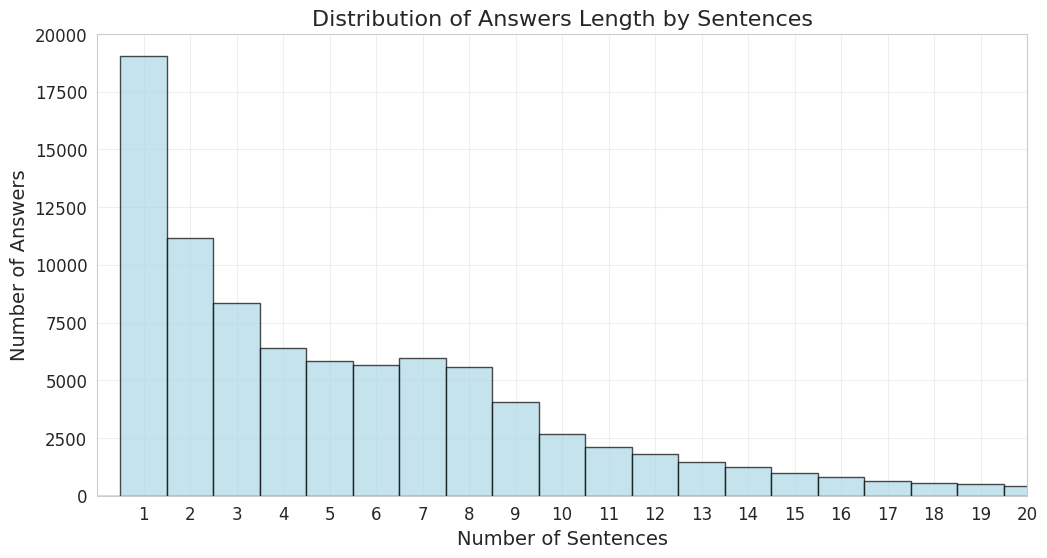

min_sentence: 0
max_sentence: 262

=== 문장 수 통계 ===
총 답변 수: 87431
평균 문장 수: 5.86
중간값 문장 수: 41.00
최소 문장 수: 0
최대 문장 수: 262

=== 상위 10개 문장 수 빈도 ===
1문장: 19056개 답변
2문장: 11183개 답변
3문장: 8347개 답변
4문장: 6380개 답변
7문장: 5966개 답변
5문장: 5855개 답변
6문장: 5682개 답변
8문장: 5554개 답변
9문장: 4067개 답변
10문장: 2692개 답변


In [17]:
import json
import matplotlib.pyplot as plt
import numpy as np
import re

raw_data_path = "/home/work/factchecking/PetQA/data/interim/petqa.json"

with open(raw_data_path, 'r', encoding='utf-8') as f:
	data = json.load(f)

def count_sentences(text):
	if not text or not isinstance(text, str):
		return 0
	# 문장 구분자: 마침표, 느낌표, 물음표, 줄바꿈
	sentences = re.split(r'[.!?]+|\n+', text.strip())
	# 빈 문장 제거
	sentences = [s.strip() for s in sentences if s.strip()]
	return len(sentences)

sentence_counts = {}
for item in data:
	answers = item.get('answers', [])
	for answer in answers:
		answer_text = answer.get('answer', '')
		if answer_text:
			sentence_cnt = count_sentences(answer_text)
			sentence_counts[sentence_cnt] = sentence_counts.get(sentence_cnt, 0) + 1

sentences = list(sentence_counts.keys())
counts = list(sentence_counts.values())

# 정수 빈 생성 (1부터 최대 문장 수까지)
min_sentence = min(sentences) if sentences else 1
max_sentence = max(sentences) if sentences else 100

# 정수 빈 생성
bins = np.arange(min_sentence - 0.5, max_sentence + 1.5, 1)

plt.figure(figsize=(12, 6))
plt.hist(sentences, bins=bins, weights=counts, color='lightblue', edgecolor='black', alpha=0.7)
plt.xlabel('Number of Sentences', fontsize=14)
plt.ylabel('Number of Answers', fontsize=14)
plt.title('Distribution of Answers Length by Sentences', fontsize=16)
plt.xticks(range(1, 21), fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, alpha=0.3)
plt.xlim(0, 20)  # x축 범위 설정
plt.show()


print(f"min_sentence: {min_sentence}")
print(f"max_sentence: {max_sentence}")

# 추가 통계 정보
total_answers = sum(counts)
avg_sentences = np.average(sentences, weights=counts)
median_sentences = np.median(sentences)

print(f"\n=== 문장 수 통계 ===")
print(f"총 답변 수: {total_answers}")
print(f"평균 문장 수: {avg_sentences:.2f}")
print(f"중간값 문장 수: {median_sentences:.2f}")
print(f"최소 문장 수: {min_sentence}")
print(f"최대 문장 수: {max_sentence}")

# 상위 10개 문장 수 빈도 출력
sorted_counts = sorted(sentence_counts.items(), key=lambda x: x[1], reverse=True)
print(f"\n=== 상위 10개 문장 수 빈도 ===")
for sentence_count, frequency in sorted_counts[:10]:
	print(f"{sentence_count}문장: {frequency}개 답변")

In [7]:
sample_keys = list(data[0].keys())
for key in sample_keys:
	print(f"{key}: {type(data[0][key])}")

id: <class 'int'>
title: <class 'str'>
content: <class 'str'>
answers: <class 'list'>
animal_type: <class 'str'>


In [8]:
total_questions = len(data)
print(f"총 질문 개수: {total_questions:,}")

총 질문 개수: 62,025


In [9]:
animal_types = [item['animal_type'] for item in data]
animal_counter = Counter(animal_types)
for animal, count in animal_counter.items():
	percentage = (count / total_questions) * 100
	print(f"{animal}: {count:,}개 ({percentage:.2f}%)")

cat: 21,235개 (34.24%)
dog: 40,790개 (65.76%)


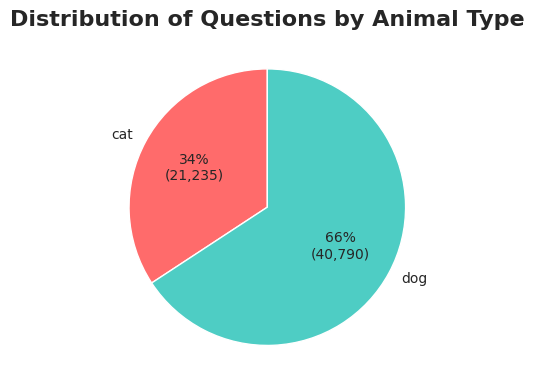

In [10]:
plt.figure(figsize=(6, 4))

def make_autopct(values):
	def my_autopct(pct):
		total = sum(values)
		val = int(round(pct*total/100.0))
		return f'{pct:.0f}%\n({val:,})'
	return my_autopct

plt.pie(animal_counter.values(), labels=animal_counter.keys(), 
		autopct=make_autopct(animal_counter.values()), startangle=90, colors=['#FF6B6B', '#4ECDC4'])
plt.title('Distribution of Questions by Animal Type', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

In [7]:
all_answers = []
answers_per_question = []
expert_answers = []
nonexpert_answers = []
selected_answers = []
multiple_selected_answers_samples = []
questions_with_selected_expert = 0


for item in data:
	question_answers = item['answers']
	answers_per_question.append(len(question_answers))

	selected_answers_cnt = 0
	max_selected_answers_cnt = 0
 
	for answer in question_answers:
		answer_info = {
			'answer_type': answer['answer_type'],
			'selected': answer['selected'],
			'q_id': item['q_id'],
			'animal_type': item['animal_type']
		}
		all_answers.append(answer_info)
		
		if answer['answer_type'] == 'expert':
			expert_answers.append(answer_info)
		else:
			nonexpert_answers.append(answer_info)
		
		if answer['selected']:
			selected_answers.append(answer_info)
			selected_answers_cnt += 1
	
	if selected_answers_cnt > 1:
		multiple_selected_answers_samples.append(item)

questions_with_selected_expert = 0
questions_with_selected_expert_and_nonexpert = 0
for item in data:
    has_selected_expert = False
    has_selected_nonexpert = False
    
    for answer in item['answers']:
        if answer['answer_type'] == 'expert' and answer['selected']:
            has_selected_expert = True
        if answer['answer_type'] != 'expert' and answer['selected']:
            has_selected_nonexpert = True
    if has_selected_expert:
        questions_with_selected_expert += 1
        if has_selected_nonexpert:
            questions_with_selected_expert_and_nonexpert += 1
  

print(f"전체 답변: {len(all_answers):,}개")
print(f"Expert 답변: {len(expert_answers):,}개 ({len(expert_answers)/len(all_answers)*100:.2f}%)")
print(f"Nonexpert 답변: {len(nonexpert_answers):,}개 ({len(nonexpert_answers)/len(all_answers)*100:.2f}%)")
print(f"채택된 답변: {len(selected_answers):,}개 ({len(selected_answers)/len(all_answers)*100:.2f}%)")
print(f"여러 개의 채택된 답변이 존재하는 샘플: {len(multiple_selected_answers_samples):,}개")
print(f"채택된 전문가 답변이 있는 질문: {questions_with_selected_expert}개")
print(f"채택된 전문가 답변과 일반인 답변이 모두 존재하는 질문: {questions_with_selected_expert_and_nonexpert:,}개")

max_selected_cnt = 0
max_selected_sample = None

for sample in multiple_selected_answers_samples:
    selected_cnt = sum([ans['selected'] for ans in sample['answers']])
    if selected_cnt > max_selected_cnt:
        max_selected_cnt = selected_cnt
        max_selected_sample = sample

print(f"여러 채택 답변 중 최대 채택 개수: {max_selected_cnt}")

전체 답변: 86,961개
Expert 답변: 14,846개 (17.07%)
Nonexpert 답변: 72,115개 (82.93%)
채택된 답변: 64,129개 (73.74%)
여러 개의 채택된 답변이 존재하는 샘플: 2,235개
채택된 전문가 답변이 있는 질문: 14700개
채택된 전문가 답변과 일반인 답변이 모두 존재하는 질문: 1,923개
여러 채택 답변 중 최대 채택 개수: 5


In [2]:
"""미채택 전문가 답변"""
import json
raw_data_path = "/home/work/factchecking/PetQA/data/interim/unique_data.json"
with open(raw_data_path, 'r', encoding='utf-8') as f:
	data = json.load(f)

unselected_expert_answers = []
for item in data:
    q_id = item['q_id']
    title = item['title']
    content = item['content']
    answers = item['answers']
    animal_type = item['animal_type']
    link = item['link']
    
    for answer in answers:
        if answer['answer_type'] == 'expert' and not answer['selected']:
            unselected_expert_answer = {
                'q_id': q_id,
                'title': title,
                'content': content,
                'answers': answers,
                'question_date': item['question_date'],
                'animal_type': animal_type,
                'link': link
            }
            unselected_expert_answers.append(unselected_expert_answer)

with open('unselected_expert_answers.json', 'w', encoding='utf-8') as f:
    json.dump(unselected_expert_answers, f, ensure_ascii=False, indent=2)
print(f"채택되지 않은 전문가 답변: {len(unselected_expert_answers)}개")

채택되지 않은 전문가 답변: 145개


In [6]:
ids = []
for item in data:
	question_answers = item['answers']
	expert_count = 0
	
	for answer in question_answers:
		if answer['answer_type'] == 'expert':
			expert_count += 1
	
	if expert_count >= 2:
		ids.append(item['q_id'])

if ids:
	print(f"Expert 답변이 2개 이상인 샘플: {ids}")
else:
	print("Expert 답변이 2개 이상인 샘플이 없습니다.")

Expert 답변이 2개 이상인 질문들: [18178]


In [10]:
import numpy as np
from collections import Counter

total_answers = len(all_answers)
print(f"총 답변 개수: {total_answers:,}")

# 질문당 답변 개수 통계
min_answers = min(answers_per_question)
max_answers = max(answers_per_question)
avg_answers = np.mean(answers_per_question)
median_answers = np.median(answers_per_question)
std_answers = np.std(answers_per_question)

print(f"\n질문당 답변 개수 통계:")
print(f"  최소: {min_answers}개")
print(f"  최대: {max_answers}개")
print(f"  평균: {avg_answers:.2f}개")

# 답변 개수 분포
answer_count_distribution = Counter(answers_per_question)
print(f"\n답변 개수별 질문 분포:")
for count in sorted(answer_count_distribution.keys()):
	frequency = answer_count_distribution[count]
	percentage = (frequency / len(data)) * 100
	print(f"  {count}개 답변: {frequency:,}개 질문 ({percentage:.2f}%)")

총 답변 개수: 86,961

질문당 답변 개수 통계:
  최소: 1개
  최대: 5개
  평균: 1.41개

답변 개수별 질문 분포:
  1개 답변: 43,197개 질문 (69.87%)
  2개 답변: 13,718개 질문 (22.19%)
  3개 답변: 3,666개 질문 (5.93%)
  4개 답변: 890개 질문 (1.44%)
  5개 답변: 354개 질문 (0.57%)


In [37]:
"""채택된 답변이 3개 이상인 샘플"""
selected_3_or_more = []
for item in data:
    question_answers = item['answers']
    selected_count = 0

    for answer in question_answers:
        if answer['selected']:
            selected_count += 1

    if selected_count >= 3:
        selected_3_or_more.append(item)

print(f"채택된 답변이 3개 이상인 샘플: {len(selected_3_or_more)}")
output_path = "selected_3_or_more.json"
with open(output_path, "w", encoding="utf-8") as f:
    json.dump(selected_3_or_more, f, ensure_ascii=False, indent=2)

채택된 답변이 3개 이상인 샘플: 2235


In [ ]:
"""답변이 5개인 샘플 확인"""
import json
raw_data_path = "/home/work/factchecking/PetQA/data/interim/unique_data.json"
with open(raw_data_path, 'r', encoding='utf-8') as f:
	data = json.load(f)
 
answer_5 = []
for item in data:
    answers = item['answers']
    


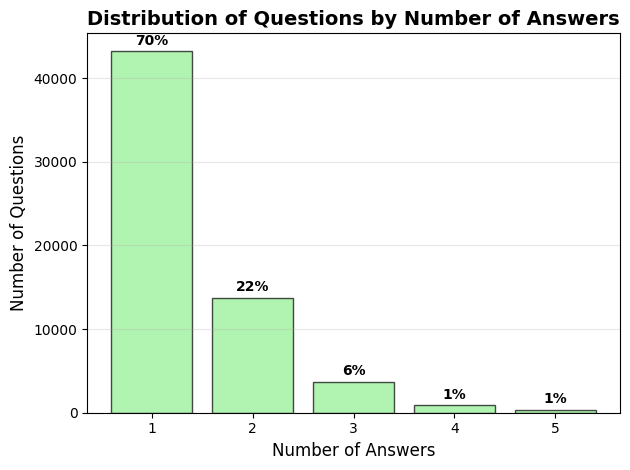

In [12]:
import matplotlib.pyplot as plt

counts = list(answer_count_distribution.keys())
frequencies = [answer_count_distribution[c] for c in counts]

plt.bar(counts, frequencies, color='lightgreen', alpha=0.7, edgecolor='black')
plt.title('Distribution of Questions by Number of Answers', fontsize=14, fontweight='bold')
plt.xlabel('Number of Answers', fontsize=12)
plt.ylabel('Number of Questions', fontsize=12)
plt.xticks(counts)
plt.grid(True, alpha=0.3, axis='y')

total = sum(frequencies)
# 막대 위에 수치 표시
for i, freq in enumerate(frequencies):
	percent = freq / total * 100
	plt.text(counts[i], freq + max(frequencies)*0.01,
			 f'{percent:.0f}%',  # 빈도와 비율 모두 표시
			ha='center', va='bottom', fontweight='bold'
	)

plt.tight_layout()
plt.show()

In [13]:
expert_count = len(expert_answers)
nonexpert_count = len(nonexpert_answers)

print(f"답변 유형별 통계:")
print(f"  Expert 답변: {expert_count:,}개 ({expert_count/total_answers*100:.2f}%)")
print(f"  Nonexpert 답변: {nonexpert_count:,}개 ({nonexpert_count/total_answers*100:.2f}%)")

# 채택 비율 분석
expert_selected = sum(1 for ans in expert_answers if ans['selected'])
nonexpert_selected = sum(1 for ans in nonexpert_answers if ans['selected'])

expert_selection_rate = (expert_selected / expert_count * 100) if expert_count > 0 else 0
nonexpert_selection_rate = (nonexpert_selected / nonexpert_count * 100) if nonexpert_count > 0 else 0

print(f"\n채택 비율 분석:")
print(f"  Expert 답변 채택률: {expert_selected:,}/{expert_count:,} ({expert_selection_rate:.2f}%)")
print(f"  Nonexpert 답변 채택률: {nonexpert_selected:,}/{nonexpert_count:,} ({nonexpert_selection_rate:.2f}%)")
print(f"  전체 채택된 답변 수: {len(selected_answers):,}")

답변 유형별 통계:
  Expert 답변: 14,846개 (17.07%)
  Nonexpert 답변: 72,115개 (82.93%)

채택 비율 분석:
  Expert 답변 채택률: 14,701/14,846 (99.02%)
  Nonexpert 답변 채택률: 49,428/72,115 (68.54%)
  전체 채택된 답변 수: 64,129


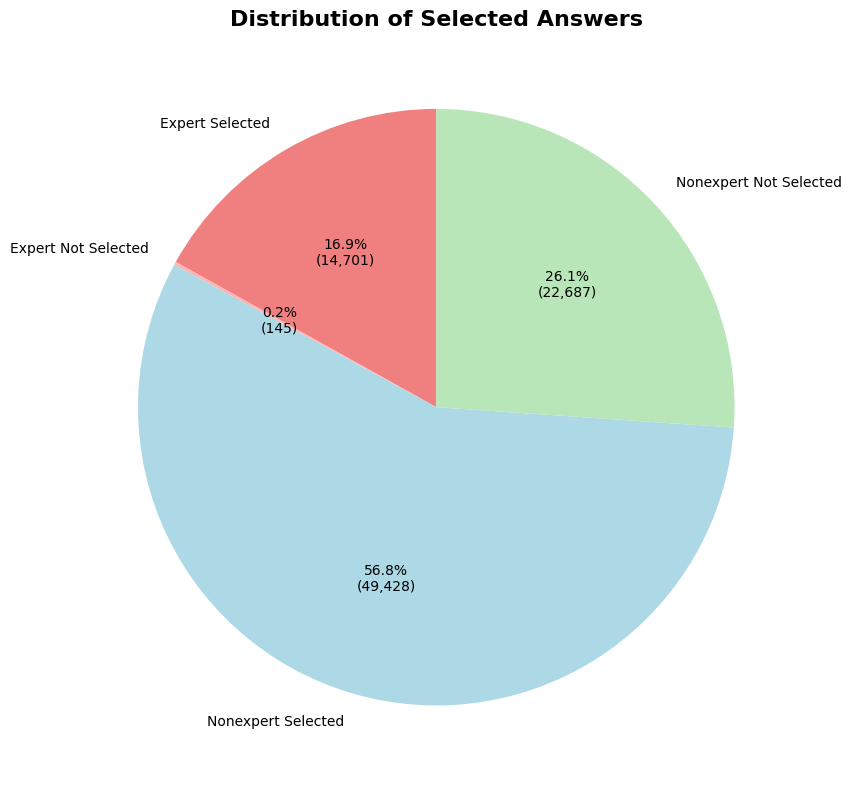

In [14]:
# 4개 섹션으로 분할된 상세 파이차트
plt.figure(figsize=(12, 8))

# 데이터 준비
labels_detailed = ['Expert Selected', 'Expert Not Selected', 'Nonexpert Selected', 'Nonexpert Not Selected']
sizes_detailed = [expert_selected, expert_count - expert_selected, 
				  nonexpert_selected, nonexpert_count - nonexpert_selected]
colors_detailed = ['lightcoral', '#FFB3B3', 'lightblue', '#B8E6B8']

def make_autopct(values):
	def my_autopct(pct):
		total = sum(values)
		val = int(round(pct*total/100.0))
		return f'{pct:.1f}%\n({val:,})'
	return my_autopct

# 파이차트 생성
wedges, texts, autotexts = plt.pie(sizes_detailed, labels=labels_detailed, colors=colors_detailed,
								   autopct=make_autopct(sizes_detailed), startangle=90, textprops={'fontsize': 10})

plt.title('Distribution of Selected Answers', fontsize=16, fontweight='bold')


plt.tight_layout()
plt.show()

In [18]:
import pandas as pd
# 질문별 종합 정보 생성
question_data = []
for item in data:
	question_info = {
		'q_id': item['q_id'],
		'animal_type': item['animal_type'],
		'num_answers': len(item['answers']),
		'has_expert': any(ans['answer_type'] == 'expert' for ans in item['answers']),
		'has_selected': any(ans['selected'] for ans in item['answers']),
		'num_selected': sum(ans['selected'] for ans in item['answers']),
		'num_expert': sum(1 for ans in item['answers'] if ans['answer_type'] == 'expert'),
		'num_nonexpert': sum(1 for ans in item['answers'] if ans['answer_type'] == 'nonexpert')
	}
	question_data.append(question_info)

questions_df = pd.DataFrame(question_data)
answers_df = pd.DataFrame(all_answers)

print(f"기본 통계:")
print(f"전문가 답변이 있는 샘플의 수: {questions_df['has_expert'].sum():,}개 ({questions_df['has_expert'].mean()*100:.2f}%)")
print(f"채택된 답변이 있는 샘플의 수: {questions_df['has_selected'].sum():,}개 ({questions_df['has_selected'].mean()*100:.2f}%)")


기본 통계:
전문가 답변이 있는 샘플의 수: 14,845개 (24.01%)
채택된 답변이 있는 샘플의 수: 61,825개 (100.00%)


In [163]:
for animal in questions_df['animal_type'].unique():
	print(f"\n{animal.upper()} 분석:")
	print("-" * 30)
	
	animal_questions = questions_df[questions_df['animal_type'] == animal]
	animal_answers = answers_df[answers_df['animal_type'] == animal]
	
	# 기본 통계
	print(f"질문 수: {len(animal_questions):,}")
	print(f"총 답변 수: {len(animal_answers):,}")
	print(f"평균 답변 수: {animal_questions['num_answers'].mean():.2f}")
	
	# 답변 유형 분석
	expert_count_animal = len(animal_answers[animal_answers['answer_type'] == 'expert'])
	expert_ratio = expert_count_animal / len(animal_answers) * 100 if len(animal_answers) > 0 else 0
	print(f"전문가 답변 비율: {expert_ratio:.2f}% ({expert_count_animal:,}/{len(animal_answers):,})")
	
	# # 채택률 분석
	# selection_ratio = animal_answers['selected'].mean() * 100
	# selected_count = animal_answers['selected'].sum()
	# print(f"답변 채택률: {selection_ratio:.2f}% ({selected_count:,}/{len(animal_answers):,})")


CAT 분석:
------------------------------
질문 수: 21,235
총 답변 수: 29,562
평균 답변 수: 1.39
전문가 답변 비율: 8.28% (2,448/29,562)
답변 채택률: 73.15% (21,626/29,562)

DOG 분석:
------------------------------
질문 수: 40,790
총 답변 수: 57,869
평균 답변 수: 1.42
전문가 답변 비율: 21.76% (12,592/57,869)
답변 채택률: 73.94% (42,790/57,869)


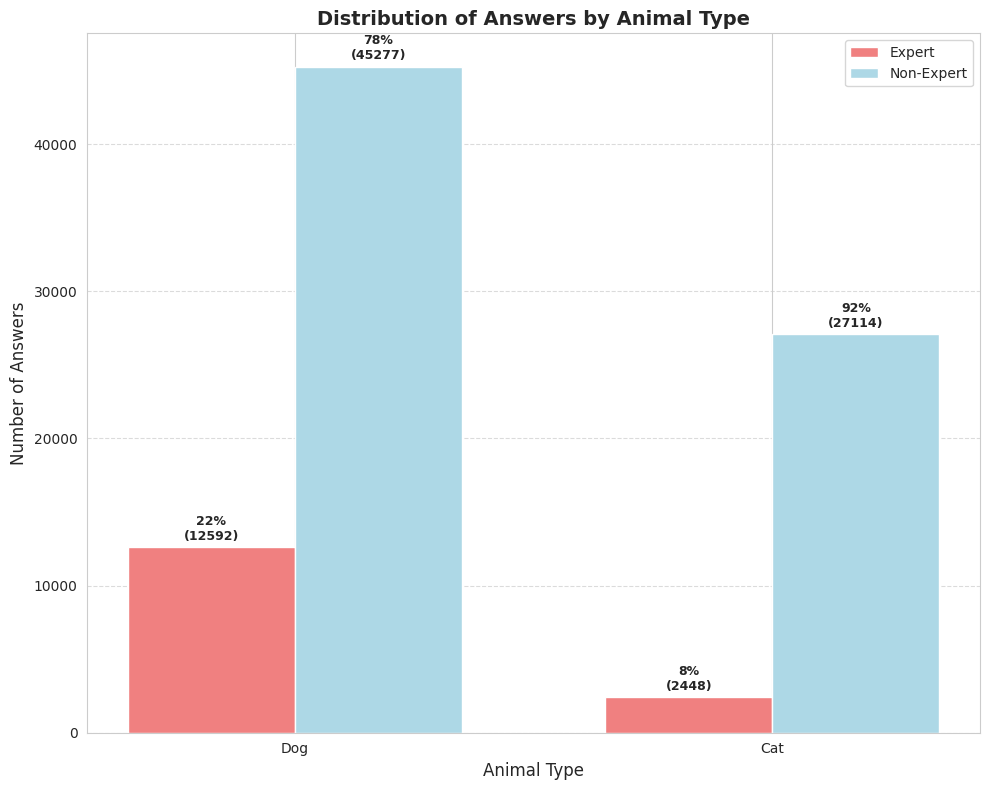

In [177]:
# Dog와 Cat의 전문가/일반인 답변 개수 계산
dog_expert_count = answers_df[(answers_df['animal_type'] == 'dog') & (answers_df['answer_type'] == 'expert')].shape[0]
dog_non_expert_count = answers_df[(answers_df['animal_type'] == 'dog') & (answers_df['answer_type'] == 'nonexpert')].shape[0]
cat_expert_count = answers_df[(answers_df['animal_type'] == 'cat') & (answers_df['answer_type'] == 'expert')].shape[0]
cat_non_expert_count = answers_df[(answers_df['animal_type'] == 'cat') & (answers_df['answer_type'] == 'nonexpert')].shape[0]

animals = ['Dog', 'Cat']
expert_counts = [dog_expert_count, cat_expert_count]
non_expert_counts = [dog_non_expert_count, cat_non_expert_count]

x = np.arange(len(animals))
width = 0.35  # 막대의 너비

fig, ax = plt.subplots(figsize=(10, 8))

rects1 = ax.bar(x - width/2, expert_counts, width, label='Expert', color='lightcoral')
rects2 = ax.bar(x + width/2, non_expert_counts, width, label='Non-Expert', color='lightblue')

ax.set_xlabel('Animal Type', fontsize=12)
ax.set_ylabel('Number of Answers', fontsize=12)
ax.set_title('Distribution of Answers by Animal Type', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(animals, fontsize=10)
ax.legend(fontsize=10)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# 각 막대 위에 수치 표시 함수
total_counts = [dog_expert_count + dog_non_expert_count, cat_expert_count + cat_non_expert_count]

def autolabel_percent(rects, counts, total):
	for rect, count, tot in zip(rects, counts, total):
		height = rect.get_height()
		percent = height / tot * 100 if tot > 0 else 0
		ax.annotate(f'{percent:.0f}%\n({int(height)})',
					xy=(rect.get_x() + rect.get_width() / 2, height),
					xytext=(0, 3),  # 3 points vertical offset
					textcoords="offset points",
					ha='center', va='bottom', fontsize=9, fontweight='bold')

autolabel_percent(rects1, expert_counts, total_counts)
autolabel_percent(rects2, non_expert_counts, total_counts)

fig.tight_layout()
plt.show()

In [83]:
print("=" * 80)
print("📊 PetQA 데이터셋 EDA 최종 요약 리포트")
print("=" * 80)

print(f"\n🔍 전체 데이터 개요:")
print(f"  • 총 질문 수: {total_questions:,}개")
print(f"  • 총 답변 수: {total_answers:,}개")
print(f"  • 평균 질문당 답변 수: {avg_answers:.2f}개")

print(f"\n🐕🐱 Animal Type 분포:")
for animal, count in animal_counter.items():
	percentage = (count / total_questions) * 100
	print(f"  • {animal}: {count:,}개 ({percentage:.1f}%)")

print(f"\n👨‍⚕️ 답변자 유형 분석:")
print(f"  • Expert 답변: {expert_count:,}개 ({expert_count/total_answers*100:.1f}%)")
print(f"  • Nonexpert 답변: {nonexpert_count:,}개 ({nonexpert_count/total_answers*100:.1f}%)")

print(f"\n✅ 채택률 분석:")
print(f"  • Expert 답변 채택률: {expert_selection_rate:.1f}%")
print(f"  • Nonexpert 답변 채택률: {nonexpert_selection_rate:.1f}%")
print(f"  • 전체 채택된 답변: {len(selected_answers):,}개")

print(f"\n📈 질문별 통계:")
print(f"  • 전문가 답변이 있는 질문: {questions_df['has_expert'].sum():,}개 ({questions_df['has_expert'].mean()*100:.1f}%)")
print(f"  • 채택된 답변이 있는 질문: {questions_df['has_selected'].sum():,}개 ({questions_df['has_selected'].mean()*100:.1f}%)")

print(f"\n" + "=" * 80)

📊 PetQA 데이터셋 EDA 최종 요약 리포트

🔍 전체 데이터 개요:
  • 총 질문 수: 62,025개
  • 총 답변 수: 87,431개
  • 평균 질문당 답변 수: 1.41개

🐕🐱 Animal Type 분포:
  • cat: 21,235개 (34.2%)
  • dog: 40,790개 (65.8%)

👨‍⚕️ 답변자 유형 분석:
  • Expert 답변: 15,040개 (17.2%)
  • Nonexpert 답변: 72,391개 (82.8%)

✅ 채택률 분석:
  • Expert 답변 채택률: 98.6%
  • Nonexpert 답변 채택률: 68.5%
  • 전체 채택된 답변: 64,416개

📈 질문별 통계:
  • 전문가 답변이 있는 질문: 15,038개 (24.2%)
  • 채택된 답변이 있는 질문: 62,025개 (100.0%)



# 토큰 계산

In [18]:
import tiktoken
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import math
import anthropic
import google.generativeai as genai
import os
from dotenv import load_dotenv
load_dotenv()
ANTHROPIC_API_KEY = os.getenv("ANTHROPIC_API_KEY")
GOOGLE_API_KEY = os.getenv("GOOGLE_API_KEY")

In [ ]:
df = pd.read_json("/home/work/factchecking/PetQA/data/interim/petqa.json")

In [178]:
import math
models = {
	'gpt-4o-mini': {"input_token": 0.15, "output_token": 0.60, "avg_output_token": 127},
	'claude-3-haiku': {"input_token": 0.25, "output_token": 1.25, "avg_output_token": 238},
	'gemini-2.0-flash': {"input_token": 0.1, "output_token": 0.4, "avg_output_token": 122},
}

avg_input_token = {
	"0": [265, 417, 231],
	"1": [567, 916, 510],
	"3": [1181, 1933, 1074],
	"6": [2106, 3464, 1925],
}

total_cost = 0

print("전처리 (gpt-4o-mini)")
filtering_size = 62025
cost = models["gpt-4o-mini"]["input_token"] * 584 + models["gpt-4o-mini"]["output_token"] * 1
cost = math.ceil((cost * filtering_size) / 1000000)
total_cost += cost
print(f"필터링 비용: {cost} USD")

cleaning_size = 62025
cost = models["gpt-4o-mini"]["input_token"] * 760 + models["gpt-4o-mini"]["output_token"] * 278
cost = math.ceil((cost * cleaning_size) / 1000000)
total_cost += cost
print(f"클리닝 비용: {cost} USD")
print("---"*10)

print("답변 생성 비용")
test_size = 2000  # 500 * 4
for i, (model_name, price) in enumerate(models.items()):
	for shot, tokens in avg_input_token.items():
		# 입력 형식에 따른 비용 고려
		cost = 2 * (price["input_token"] * tokens[i] + price["output_token"] * price["avg_output_token"])
		cost = math.ceil((cost * test_size) / 1000000)
		total_cost += cost
		print(f"{model_name}-{shot}: {cost} USD")
	print("---"*10)

print(f"총 비용: {total_cost} USD")

전처리 (gpt-4o-mini)
필터링 비용: 6 USD
클리닝 비용: 18 USD
------------------------------
답변 생성 비용
gpt-4o-mini-0: 1 USD
gpt-4o-mini-1: 1 USD
gpt-4o-mini-3: 2 USD
gpt-4o-mini-6: 2 USD
------------------------------
claude-3-haiku-0: 2 USD
claude-3-haiku-1: 3 USD
claude-3-haiku-3: 4 USD
claude-3-haiku-6: 5 USD
------------------------------
gemini-2.0-flash-0: 1 USD
gemini-2.0-flash-1: 1 USD
gemini-2.0-flash-3: 1 USD
gemini-2.0-flash-6: 1 USD
------------------------------
총 비용: 48 USD
